In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
# df = pd.read_csv('your_data.csv')  # Load your dataset
# X = df.drop('target_column', axis=1)  # Replace 'target_column' with your actual target column name
# y = df['target_column']

In [7]:
x = [[0,0],[1,1]]
y = [0,1]
clf = RandomForestClassifier(n_estimators=10)
clf.fit(x,y)

RandomForestClassifier(n_estimators=10)

In [8]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=10, centers =3, n_features=2, random_state=22)

In [9]:
y

array([0, 0, 2, 1, 2, 1, 2, 1, 0, 0])

In [10]:
X, y =make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=9)
scores = cross_val_score(clf, X, y)
scores.mean()

np.float64(0.9818000000000001)

In [11]:
#Random forest
rf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2,
                            random_state=1)
rfscores = cross_val_score(rf, X, y)
rfscores.mean()

np.float64(0.9994999999999999)

In [13]:
cc = RandomForestClassifier(n_estimators=20, max_depth=15, random_state=0)
RFscores = cross_val_score(cc, X, y) # default 5-fold cross validation
print (RFscores.mean())     

1.0


In [17]:
#Adaboost
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
iris = load_iris()
ada = AdaBoostClassifier(n_estimators=500)
scores = cross_val_score(ada, iris.data, iris.target)
scores.mean()

np.float64(0.9466666666666667)

In [20]:
param_grid = {
    'n_estimators':[50,500],
    'learning_rate':[0.01, 0.1]}
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')
grid_search.fit(iris.data, iris.target)
print('best parameters', grid_search.best_params_)
print('best cross-validation score', grid_search.best_score_)

best parameters {'learning_rate': 0.1, 'n_estimators': 500}
best cross-validation score 0.9533333333333334


In [4]:
#Gradient Tree Boosting
titanic = pd.read_csv("titanic.csv")
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
x = titanic[features]
y = titanic['Survived']
x = pd.get_dummies(x, columns=['Sex','Embarked'], drop_first=True) #turn categorical into numerical
x['Age'] = x['Age'].fillna(x['Age'].mean())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

gradient=GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=10,
                                      random_state=1).fit(x_train,y_train)
gradient.score(x_test,y_test)

0.7653631284916201

In [5]:
aa = {
    'n_estimators': [100, 500],
   'learning_rate': [0.1, 1.0],
    'max_depth': [3, 10],
    'min_samples_split': [2, 10],
}


In [8]:
grid_search = GridSearchCV(estimator=gradient, param_grid=aa, cv=5,scoring='accuracy')
grid_search.fit(x_train, y_train)
print(f"best parameter found:{grid_search.best_params_}")
print(f"best cross-validation score: {grid_search.best_score_}")

best parameter found:{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
best cross-validation score: 0.813148823007978


In [9]:
#using the best
best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(x_test)
test_accuracy = best_clf.score(x_test, y_test)
print(f"test accuracy:{test_accuracy:.2%}")

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix",confusion)

test accuracy:81.56%
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179


Confusion Matrix [[95 10]
 [23 51]]


In [2]:
#xgboost
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [4]:
iris = load_iris()
a, b=iris.data, iris.target
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=2)
xgboost = xgb.XGBClassifier(objective="multi:solftmax", num_class=3, random_state=1)
param_grid = {
    'learning_rate':[0.01, 0.1,0.2],
    'n_estimators':[50, 100,200],
    'max_depth':[3, 4, 5],
    'min_child_weight':[1,2,3]}
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(a_train, b_train)
best_p = grid_search.best_params_
best_xg = grid_search.best_estimator_
b_pred = best_xg.predict(a_test)

accuracy = accuracy_score(b_test, b_pred)
report = classification_report(b_test, b_pred, target_names=iris.target_names)
print(f"best parameters:{best_p}","\n","accuracy:",accuracy, "\n","Classification Report:\n", report)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
best parameters:{'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200} 
 accuracy: 0.9777777777777777 
 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.93      0.97        15
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0.5, 1.0, 'Feature Importance Plot')

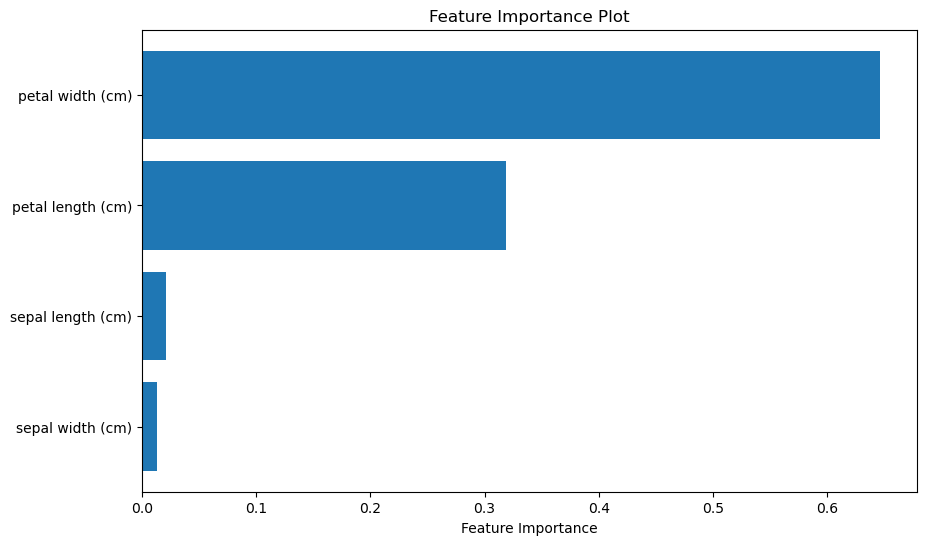

In [16]:
#feature importance
import matplotlib.pyplot as plt
feature_name=iris.feature_names
feature_importance = pd.DataFrame({
    'Feature':feature_name,
    'Importance':best_xg.feature_importances_}).sort_values(by='Importance', ascending=True)
feature_importance['Importance'] /= feature_importance['Importance'].sum()
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'],feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')

In [23]:
#self voting
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
xx,yy = iris.data[:,1:3], iris.target

In [33]:
def evaluation_clf(x, y):
    clf1 = LogisticRegression(random_state=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    eclf = VotingClassifier(estimators=[('lr', clf1),('rf',clf2),('gnb',clf3)], voting='hard')#or soft
    
    classifiers = [clf1, clf2, clf3, eclf]
    labels=['logistic regression', 'random forest', 'naive bayes', 'ensemble']
    for clf, label in zip(classifiers, labels):
        scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
        print(f"Accuracy:{scores.mean():.3f}(+/- {scores.std():.4f} [{label}]")
        clf.fit(x,y)
        y_pred=clf.predict(x)

        print(f"confusion matrix for {label}:\n{confusion_matrix(y,y_pred)}\n")
        print(f"classification report for {label} :\n{classification_report(y, y_pred)}\n")

In [32]:
evaluation_clf(xx,yy)

Accuracy:0.953(+/- 0.0400 [logistic regression]
confusion matrix for logistic regression:
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]

classification report for logistic regression :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150


Accuracy:0.940(+/- 0.0389 [random forest]
confusion matrix for random forest:
[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]

classification report for random forest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg